# Laporan Tugas Akhir Fuzzy Logic

Nama  : Alif As'ad Ramadhan

NRP   : 5054231007

In [211]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 1. Mendefinisikan Variabel Fuzzy:

## Input:

- Suhu (°C):

- Rendah (0-20)

- Sedang (15-30)

- Tinggi (25-40)

## Kelembapan (%):
- Rendah (0-40)

- Sedang (30-70)

- Tinggi (60-100)

- Output:

## Tingkat Kenyamanan:
- Rendah (0-40)

- Sedang (30-70)

- Tinggi (60-100)

In [2]:
# Definisi variabel
x_suhu = np.arange(0, 41, 1)
x_kelembapan = np.arange(0, 101, 1)
x_kenyamanan = np.arange(0, 101, 1)

# Fungsi keanggotaan untuk Suhu
suhu_rendah = fuzz.trimf(x_suhu, [0, 0, 20])
suhu_sedang = fuzz.trimf(x_suhu, [15, 22, 30])
suhu_tinggi = fuzz.trimf(x_suhu, [25, 40, 40])

# Fungsi keanggotaan untuk Kelembapan
kelembapan_rendah = fuzz.trimf(x_kelembapan, [0, 0, 40])
kelembapan_sedang = fuzz.trimf(x_kelembapan, [30, 50, 70])
kelembapan_tinggi = fuzz.trimf(x_kelembapan, [60, 100, 100])

# Fungsi keanggotaan untuk Tingkat Kenyamanan
kenyamanan_rendah = fuzz.trimf(x_kenyamanan, [0, 0, 40])
kenyamanan_sedang = fuzz.trimf(x_kenyamanan, [30, 50, 70])
kenyamanan_tinggi = fuzz.trimf(x_kenyamanan, [60, 100, 100])

Variabel `suhu sedang` didapatkan dari nilai median dari `15 - 30`. kemudian hasilnya di bulatkan kebawah

# 2. Visualisasi Fungsi Membership (Keanggotaan) `Suhu`

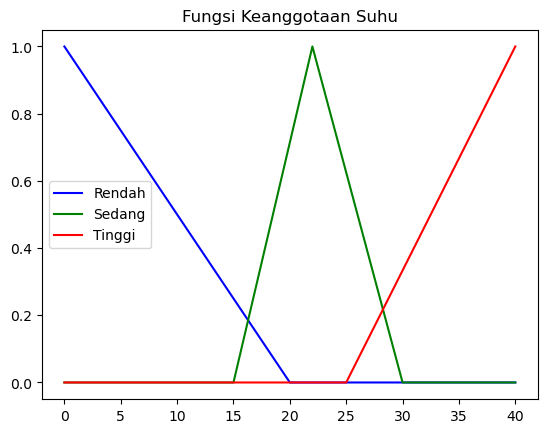

In [3]:
# Visualisasi
plt.figure()
plt.plot(x_suhu, suhu_rendah, 'b', label='Rendah')
plt.plot(x_suhu, suhu_sedang, 'g', label='Sedang')
plt.plot(x_suhu, suhu_tinggi, 'r', label='Tinggi')
plt.title('Fungsi Keanggotaan Suhu')
plt.legend()
plt.show()

# 3. Visualisasi Fungsi Membership (Keanggotaan) `Kelembapan`

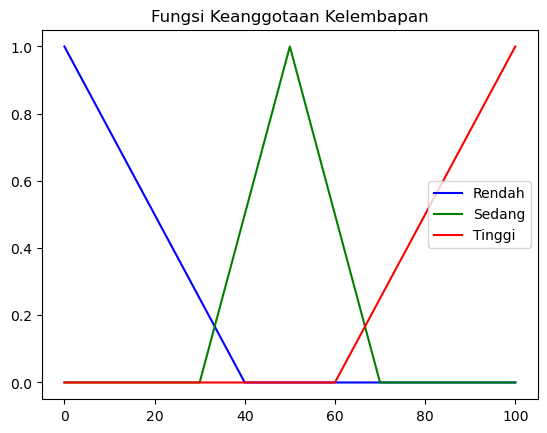

In [4]:
# Visualisasi
plt.figure()
plt.plot(x_kelembapan, kelembapan_rendah, 'b', label='Rendah')
plt.plot(x_kelembapan, kelembapan_sedang, 'g', label='Sedang')
plt.plot(x_kelembapan, kelembapan_tinggi, 'r', label='Tinggi')
plt.title('Fungsi Keanggotaan Kelembapan')
plt.legend()
plt.show()

# 3. Visualisasi Fungsi Membership (Keanggotaan) `Kenyamanan`

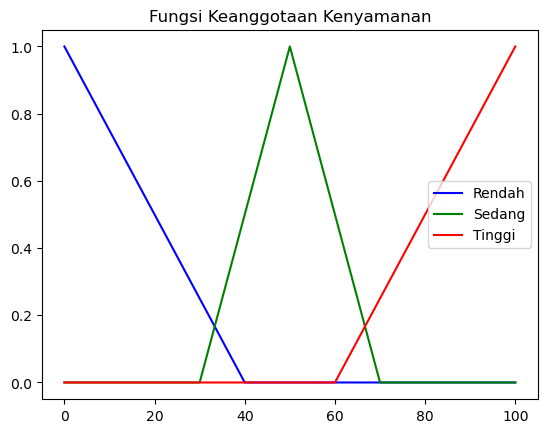

In [142]:
# Visualisasi
plt.figure()
plt.plot(x_kenyamanan, kenyamanan_rendah, 'b', label='Rendah')
plt.plot(x_kenyamanan, kenyamanan_sedang, 'g', label='Sedang')
plt.plot(x_kenyamanan, kenyamanan_tinggi, 'r', label='Tinggi')
plt.title('Fungsi Keanggotaan Kenyamanan')
plt.legend()
plt.show()

# Aturan

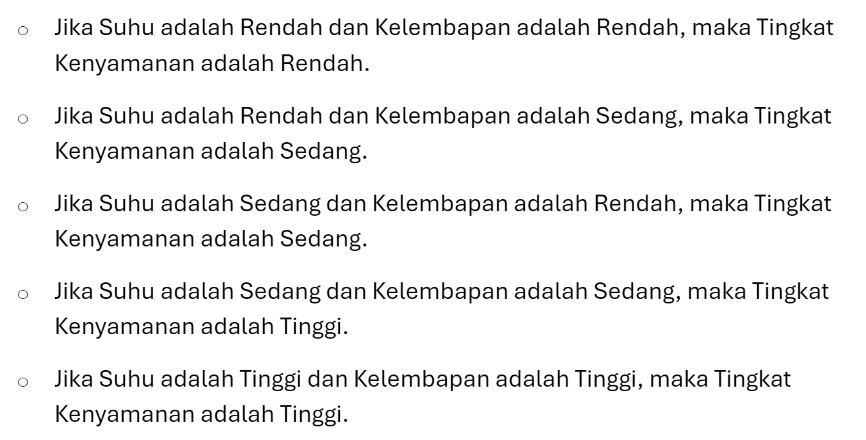

# Yang di uji

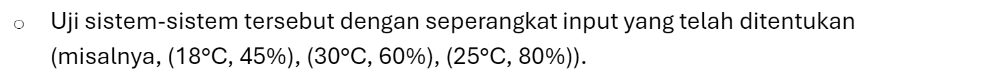

# Fuzzy Logic Mamdani

Metode Fuzzy Mamdani merupakan salah satu bagian dari Fuzzy Inference System yang berguna untuk penarikan kesimpulan atau suatu keputusan terbaik dalam permasalahan yang tidak pasti (Bova, 2010). Metode Fuzzy Mamdani diperkenalkan oleh Ebrahim Mamdani pada tahun 1975.

### Uji Suhu dengan `suhu : 18° dan 45%`

In [149]:
suhu = 18
kelembapan = 45

# Menghitung derajat keanggotaan input suhu dan kelembapan
suhu_level_lo = fuzz.interp_membership(x_suhu, suhu_rendah, suhu)
suhu_level_md = fuzz.interp_membership(x_suhu, suhu_sedang, suhu)
suhu_level_hi = fuzz.interp_membership(x_suhu, suhu_tinggi, suhu)

kelembapan_level_lo = fuzz.interp_membership(x_kelembapan, kelembapan_rendah, kelembapan)
kelembapan_level_md = fuzz.interp_membership(x_kelembapan, kelembapan_sedang, kelembapan)
kelembapan_level_hi = fuzz.interp_membership(x_kelembapan, kelembapan_tinggi, kelembapan)

# Aturan 1: Jika Suhu Rendah dan Kelembapan Rendah, maka Tingkat Kenyamanan Rendah
active_rule1 = np.fmin(suhu_level_lo, kelembapan_level_lo)
kenyamanan_activation_lo = np.fmin(active_rule1, kenyamanan_rendah)

# Aturan 2: Jika Suhu Rendah dan Kelembapan Sedang, maka Tingkat Kenyamanan Sedang
active_rule2 = np.fmin(suhu_level_lo, kelembapan_level_md)
kenyamanan_activation_md1 = np.fmin(active_rule2, kenyamanan_sedang)

# Aturan 3: Jika Suhu Sedang dan Kelembapan Rendah, maka Tingkat Kenyamanan Sedang
active_rule3 = np.fmin(suhu_level_md, kelembapan_level_lo)
kenyamanan_activation_md2 = np.fmin(active_rule3, kenyamanan_sedang)

# Aturan 4: Jika Suhu Sedang dan Kelembapan Sedang, maka Tingkat Kenyamanan Tinggi
active_rule4 = np.fmin(suhu_level_md, kelembapan_level_md)
kenyamanan_activation_hi1 = np.fmin(active_rule4, kenyamanan_tinggi)

# Aturan 5: Jika Suhu Tinggi dan Kelembapan Tinggi, maka Tingkat Kenyamanan Tinggi
active_rule5 = np.fmin(suhu_level_hi, kelembapan_level_hi)
kenyamanan_activation_hi2 = np.fmin(active_rule5, kenyamanan_tinggi)

# Array nol untuk aggregasi
kenyamanan0 = np.zeros_like(x_kenyamanan)

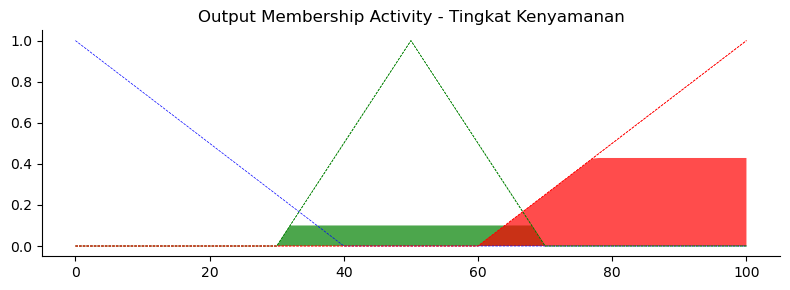

In [153]:
# Visualisasi Aktivitas Output Keanggotaan
fig, ax0 = plt.subplots(figsize=(8, 3))

# Mengisi area berdasarkan hasil aturan dengan warna yang sesuai
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_rendah, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_md1, facecolor='g', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_md2, facecolor='g', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_hi1, facecolor='r', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_tinggi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_hi2, facecolor='r', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_tinggi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output Membership Activity - Tingkat Kenyamanan')

# Menghilangkan sumbu atas dan kanan
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

Input yang diberikan dalam sistem ini menghasilkan aktivasi utama pada kenyamanan tinggi (area merah), dengan kontribusi tambahan dari kenyamanan sedang (area hijau). Output menunjukkan bahwa input lebih cocok untuk kategori "tinggi" dibandingkan "sedang" atau "rendah," meskipun masih terdapat sedikit tumpang tindih atau kontribusi dari kategori "sedang." Grafik ini mencerminkan agregasi akhir dari semua aturan fuzzy dan memperlihatkan bagaimana input diterjemahkan menjadi hasil berupa tingkat kenyamanan yang dapat diinterpretasi oleh sistem.

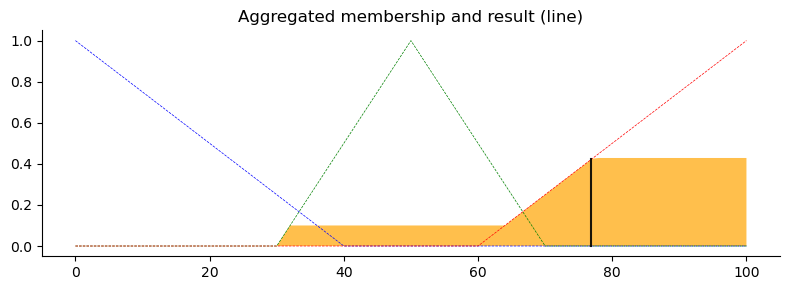

Nilai Crisp (Tingkat Kenyamanan): 76.90256520801896


In [36]:
# Menggabungkan semua output aktivasi menggunakan metode maksimum (agregasi)
aggregated_kenyamanan = np.fmax(kenyamanan_activation_lo,
                                np.fmax(kenyamanan_activation_md1,
                                        np.fmax(kenyamanan_activation_md2,
                                                np.fmax(kenyamanan_activation_hi1,
                                                        kenyamanan_activation_hi2))))

# Defuzzifikasi untuk mendapatkan nilai crisp
kenyamanan_crisp = fuzz.defuzz(x_kenyamanan, aggregated_kenyamanan, 'centroid')
kenyamanan_result = fuzz.interp_membership(x_kenyamanan, aggregated_kenyamanan, kenyamanan_crisp)

# Visualisasi hasil agregasi dan defuzzifikasi
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_kenyamanan, kenyamanan_rendah, 'b', linewidth=0.5, linestyle='--')
ax0.plot(x_kenyamanan, kenyamanan_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_kenyamanan, kenyamanan_tinggi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, 0, aggregated_kenyamanan, facecolor='orange', alpha=0.7)
ax0.plot([kenyamanan_crisp, kenyamanan_crisp], [0, kenyamanan_result], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Menghilangkan sumbu atas dan kanan
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

# Output nilai crisp
print(f"Nilai Crisp (Tingkat Kenyamanan): {kenyamanan_crisp}")

Gambar di atas menunjukkan hasil agregasi keanggotaan dari sistem fuzzy untuk tingkat kenyamanan. Kurva biru, hijau, dan merah merepresentasikan fungsi keanggotaan untuk kenyamanan rendah, sedang, dan tinggi, dengan area oranye sebagai hasil agregasi dari aturan yang diaktifkan. Garis hitam vertikal menunjukkan nilai crisp akhir, yaitu `76.90`, yang menunjukkan tingkat kenyamanan yang tinggi. Grafik ini mengilustrasikan bagaimana input diproses menjadi output yang jelas dalam sistem fuzzy.

### Uji Suhu dengan `suhu : 30° dan 75%`

In [77]:
suhu = 30
kelembapan = 75
# Menghitung derajat keanggotaan input suhu dan kelembapan
suhu_level_lo = fuzz.interp_membership(x_suhu, suhu_rendah, suhu)
suhu_level_md = fuzz.interp_membership(x_suhu, suhu_sedang, suhu)
suhu_level_hi = fuzz.interp_membership(x_suhu, suhu_tinggi, suhu)

kelembapan_level_lo = fuzz.interp_membership(x_kelembapan, kelembapan_rendah, kelembapan)
kelembapan_level_md = fuzz.interp_membership(x_kelembapan, kelembapan_sedang, kelembapan)
kelembapan_level_hi = fuzz.interp_membership(x_kelembapan, kelembapan_tinggi, kelembapan)

# Aturan 1: Jika Suhu Rendah dan Kelembapan Rendah, maka Tingkat Kenyamanan Rendah
active_rule1 = np.fmin(suhu_level_lo, kelembapan_level_lo)
kenyamanan_activation_lo = np.fmin(active_rule1, kenyamanan_rendah)

# Aturan 2: Jika Suhu Rendah dan Kelembapan Sedang, maka Tingkat Kenyamanan Sedang
active_rule2 = np.fmin(suhu_level_lo, kelembapan_level_md)
kenyamanan_activation_md1 = np.fmin(active_rule2, kenyamanan_sedang)

# Aturan 3: Jika Suhu Sedang dan Kelembapan Rendah, maka Tingkat Kenyamanan Sedang
active_rule3 = np.fmin(suhu_level_md, kelembapan_level_lo)
kenyamanan_activation_md2 = np.fmin(active_rule3, kenyamanan_sedang)

# Aturan 4: Jika Suhu Sedang dan Kelembapan Sedang, maka Tingkat Kenyamanan Tinggi
active_rule4 = np.fmin(suhu_level_md, kelembapan_level_md)
kenyamanan_activation_hi1 = np.fmin(active_rule4, kenyamanan_tinggi)

# Aturan 5: Jika Suhu Tinggi dan Kelembapan Tinggi, maka Tingkat Kenyamanan Tinggi
active_rule5 = np.fmin(suhu_level_hi, kelembapan_level_hi)
kenyamanan_activation_hi2 = np.fmin(active_rule5, kenyamanan_tinggi)

# Array nol untuk aggregasi
kenyamanan0 = np.zeros_like(x_kenyamanan)

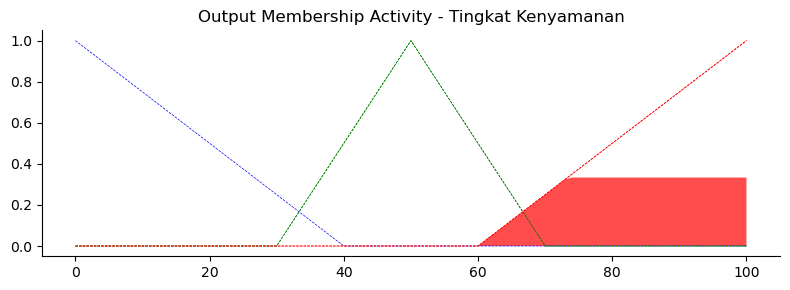

In [79]:
# Visualisasi Aktivitas Output Keanggotaan
fig, ax0 = plt.subplots(figsize=(8, 3))

# Mengisi area berdasarkan hasil aturan dengan warna yang sesuai
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_rendah, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_md1, facecolor='g', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_md2, facecolor='g', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_hi1, facecolor='r', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_tinggi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_hi2, facecolor='r', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_tinggi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output Membership Activity - Tingkat Kenyamanan')

# Menghilangkan sumbu atas dan kanan
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

Input yang diberikan dalam sistem ini menghasilkan aktivasi utama pada kenyamanan tinggi (area merah). Output menunjukkan bahwa input lebih cocok untuk kategori "tinggi" dibandingkan "sedang" atau "rendah". Grafik ini mencerminkan agregasi akhir dari semua aturan fuzzy dan memperlihatkan bagaimana input diterjemahkan menjadi hasil berupa tingkat kenyamanan yang dapat diinterpretasi oleh sistem.

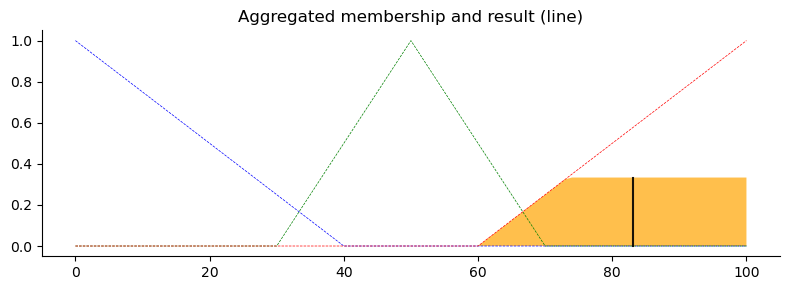

Nilai Crisp (Tingkat Kenyamanan): 83.1135283820955


In [81]:
# Menggabungkan semua output aktivasi menggunakan metode maksimum (agregasi)
aggregated_kenyamanan = np.fmax(kenyamanan_activation_lo,
                                np.fmax(kenyamanan_activation_md1,
                                        np.fmax(kenyamanan_activation_md2,
                                                np.fmax(kenyamanan_activation_hi1,
                                                        kenyamanan_activation_hi2))))

# Defuzzifikasi untuk mendapatkan nilai crisp
kenyamanan_crisp = fuzz.defuzz(x_kenyamanan, aggregated_kenyamanan, 'centroid')
kenyamanan_result = fuzz.interp_membership(x_kenyamanan, aggregated_kenyamanan, kenyamanan_crisp)

# Visualisasi hasil agregasi dan defuzzifikasi
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_kenyamanan, kenyamanan_rendah, 'b', linewidth=0.5, linestyle='--')
ax0.plot(x_kenyamanan, kenyamanan_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_kenyamanan, kenyamanan_tinggi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, 0, aggregated_kenyamanan, facecolor='orange', alpha=0.7)
ax0.plot([kenyamanan_crisp, kenyamanan_crisp], [0, kenyamanan_result], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Menghilangkan sumbu atas dan kanan
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

# Output nilai crisp
print(f"Nilai Crisp (Tingkat Kenyamanan): {kenyamanan_crisp}")

Gambar di atas menunjukkan hasil agregasi keanggotaan dari sistem fuzzy untuk tingkat kenyamanan. Kurva biru, hijau, dan merah merepresentasikan fungsi keanggotaan untuk kenyamanan rendah, sedang, dan tinggi, dengan area oranye sebagai hasil agregasi dari aturan yang diaktifkan. Garis hitam vertikal menunjukkan nilai crisp akhir, yaitu `83.11`, yang menunjukkan tingkat kenyamanan yang tinggi. Grafik ini mengilustrasikan bagaimana input diproses menjadi output yang jelas dalam sistem fuzzy.

### Uji Suhu dengan `suhu : 18° dan 25%`

In [84]:
suhu = 18
kelembapan = 25
# Menghitung derajat keanggotaan input suhu dan kelembapan
suhu_level_lo = fuzz.interp_membership(x_suhu, suhu_rendah, suhu)
suhu_level_md = fuzz.interp_membership(x_suhu, suhu_sedang, suhu)
suhu_level_hi = fuzz.interp_membership(x_suhu, suhu_tinggi, suhu)

kelembapan_level_lo = fuzz.interp_membership(x_kelembapan, kelembapan_rendah, kelembapan)
kelembapan_level_md = fuzz.interp_membership(x_kelembapan, kelembapan_sedang, kelembapan)
kelembapan_level_hi = fuzz.interp_membership(x_kelembapan, kelembapan_tinggi, kelembapan)

# Aturan 1: Jika Suhu Rendah dan Kelembapan Rendah, maka Tingkat Kenyamanan Rendah
active_rule1 = np.fmin(suhu_level_lo, kelembapan_level_lo)
kenyamanan_activation_lo = np.fmin(active_rule1, kenyamanan_rendah)

# Aturan 2: Jika Suhu Rendah dan Kelembapan Sedang, maka Tingkat Kenyamanan Sedang
active_rule2 = np.fmin(suhu_level_lo, kelembapan_level_md)
kenyamanan_activation_md1 = np.fmin(active_rule2, kenyamanan_sedang)

# Aturan 3: Jika Suhu Sedang dan Kelembapan Rendah, maka Tingkat Kenyamanan Sedang
active_rule3 = np.fmin(suhu_level_md, kelembapan_level_lo)
kenyamanan_activation_md2 = np.fmin(active_rule3, kenyamanan_sedang)

# Aturan 4: Jika Suhu Sedang dan Kelembapan Sedang, maka Tingkat Kenyamanan Tinggi
active_rule4 = np.fmin(suhu_level_md, kelembapan_level_md)
kenyamanan_activation_hi1 = np.fmin(active_rule4, kenyamanan_tinggi)

# Aturan 5: Jika Suhu Tinggi dan Kelembapan Tinggi, maka Tingkat Kenyamanan Tinggi
active_rule5 = np.fmin(suhu_level_hi, kelembapan_level_hi)
kenyamanan_activation_hi2 = np.fmin(active_rule5, kenyamanan_tinggi)

# Array nol untuk aggregasi
kenyamanan0 = np.zeros_like(x_kenyamanan)

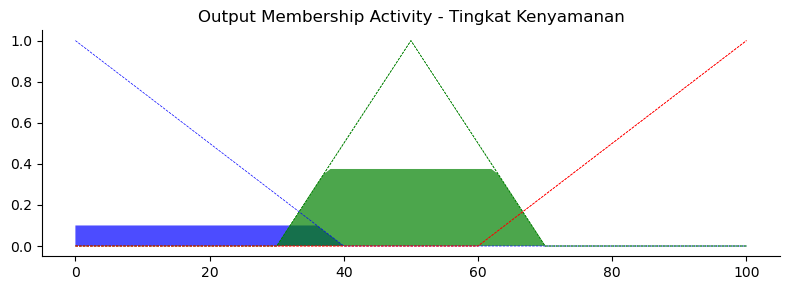

In [86]:
# Visualisasi Aktivitas Output Keanggotaan
fig, ax0 = plt.subplots(figsize=(8, 3))

# Mengisi area berdasarkan hasil aturan dengan warna yang sesuai
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_rendah, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_md1, facecolor='g', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_md2, facecolor='g', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_hi1, facecolor='r', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_tinggi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, kenyamanan0, kenyamanan_activation_hi2, facecolor='r', alpha=0.7)
ax0.plot(x_kenyamanan, kenyamanan_tinggi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output Membership Activity - Tingkat Kenyamanan')

# Menghilangkan sumbu atas dan kanan
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

Input yang diberikan dalam sistem ini menghasilkan aktivasi utama pada kenyamanan sedang (area hijau), dengan kontribusi tambahan dari kenyamanan rendah (area biru). Output menunjukkan bahwa input lebih cocok untuk kategori "sedang" dibandingkan "rendah" atau "tinggi," meskipun terdapat sedikit tumpang tindih atau kontribusi dari kategori "rendah." Grafik ini mencerminkan agregasi akhir dari semua aturan fuzzy dan menunjukkan bagaimana input diterjemahkan menjadi hasil berupa tingkat kenyamanan yang dapat diinterpretasi oleh sistem.

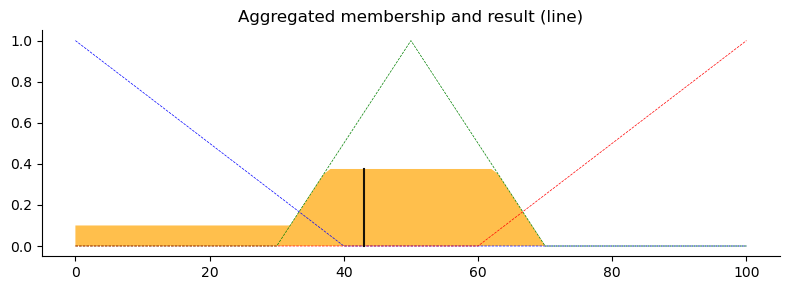

Nilai Crisp (Tingkat Kenyamanan): 42.999454446262945


In [88]:
# Menggabungkan semua output aktivasi menggunakan metode maksimum (agregasi)
aggregated_kenyamanan = np.fmax(kenyamanan_activation_lo,
                                np.fmax(kenyamanan_activation_md1,
                                        np.fmax(kenyamanan_activation_md2,
                                                np.fmax(kenyamanan_activation_hi1,
                                                        kenyamanan_activation_hi2))))

# Defuzzifikasi untuk mendapatkan nilai crisp
kenyamanan_crisp = fuzz.defuzz(x_kenyamanan, aggregated_kenyamanan, 'centroid')
kenyamanan_result = fuzz.interp_membership(x_kenyamanan, aggregated_kenyamanan, kenyamanan_crisp)

# Visualisasi hasil agregasi dan defuzzifikasi
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_kenyamanan, kenyamanan_rendah, 'b', linewidth=0.5, linestyle='--')
ax0.plot(x_kenyamanan, kenyamanan_sedang, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_kenyamanan, kenyamanan_tinggi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kenyamanan, 0, aggregated_kenyamanan, facecolor='orange', alpha=0.7)
ax0.plot([kenyamanan_crisp, kenyamanan_crisp], [0, kenyamanan_result], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Menghilangkan sumbu atas dan kanan
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

# Output nilai crisp
print(f"Nilai Crisp (Tingkat Kenyamanan): {kenyamanan_crisp}")

Gambar di atas menunjukkan hasil agregasi keanggotaan dari sistem fuzzy untuk tingkat kenyamanan. Kurva biru, hijau, dan merah merepresentasikan fungsi keanggotaan untuk kenyamanan rendah, sedang, dan tinggi, dengan area oranye sebagai hasil agregasi dari aturan yang diaktifkan. Garis hitam vertikal menunjukkan nilai crisp akhir, yaitu `42.99`, yang menunjukkan tingkat kenyamanan yang tinggi. Grafik ini mengilustrasikan bagaimana input diproses menjadi output yang jelas dalam sistem fuzzy.

# Fuzzy Sugeno

Sistem inferensi fuzzy ini diusulkan oleh Takagi, Sugeno, dan Kang untuk mengembangkan pendekatan sistematis dalam menghasilkan aturan fuzzy dari himpunan data input-output yang diberikan. Aturan fuzzy yang umum dalam model fuzzy Sugeno orde pertama memiliki bentuk:
JIKA x adalah A dan y adalah B MAKA z = f(x, y)

### Uji Suhu dengan `suhu : 18° dan 45%`

In [184]:
# Input suhu dan kelembapan
suhu = 18
kelembapan = 45

# Menghitung derajat keanggotaan input suhu dan kelembapan
suhu_level_lo = fuzz.interp_membership(x_suhu, suhu_rendah, suhu)
suhu_level_md = fuzz.interp_membership(x_suhu, suhu_sedang, suhu)
suhu_level_hi = fuzz.interp_membership(x_suhu, suhu_tinggi, suhu)

kelembapan_level_lo = fuzz.interp_membership(x_kelembapan, kelembapan_rendah, kelembapan)
kelembapan_level_md = fuzz.interp_membership(x_kelembapan, kelembapan_sedang, kelembapan)
kelembapan_level_hi = fuzz.interp_membership(x_kelembapan, kelembapan_tinggi, kelembapan)

Nilai crisp dalam metode Fuzzy Sugeno ditentukan berdasarkan pemahaman domain, skala aplikasi, kebijakan sistem, atau hasil eksperimen. Misalnya:

- Kenyamanan Rendah (20): Mewakili kondisi kurang nyaman (suhu dingin/kelembapan tinggi).

- Kenyamanan Sedang (50): Kondisi cukup nyaman dengan sedikit kekurangan.

- Kenyamanan Tinggi (80): Kondisi sangat nyaman (suhu dan kelembapan ideal).

Nilai-nilai ini dipilih untuk mencerminkan kebutuhan sistem dan dapat disesuaikan melalui eksperimen agar lebih akurat. Proses Sugeno memungkinkan hasil cepat tanpa perlu defuzzifikasi kompleks.

In [192]:
# Output Sugeno (nilai crisp tetap)
output_rendah = 20
output_sedang = 50
output_tinggi = 80

In [194]:
# Aturan Sugeno
# Aturan 1: Jika Suhu Rendah dan Kelembapan Rendah, maka output = 20 (rendah)
active_rule1 = np.fmin(suhu_level_lo, kelembapan_level_lo)
output1 = active_rule1 * output_rendah

# Aturan 2: Jika Suhu Rendah dan Kelembapan Sedang, maka output = 50 (sedang)
active_rule2 = np.fmin(suhu_level_lo, kelembapan_level_md)
output2 = active_rule2 * output_sedang

# Aturan 3: Jika Suhu Sedang dan Kelembapan Rendah, maka output = 50 (sedang)
active_rule3 = np.fmin(suhu_level_md, kelembapan_level_lo)
output3 = active_rule3 * output_sedang

# Aturan 4: Jika Suhu Sedang dan Kelembapan Sedang, maka output = 80 (tinggi)
active_rule4 = np.fmin(suhu_level_md, kelembapan_level_md)
output4 = active_rule4 * output_tinggi

# Aturan 5: Jika Suhu Tinggi dan Kelembapan Tinggi, maka output = 80 (tinggi)
active_rule5 = np.fmin(suhu_level_hi, kelembapan_level_hi)
output5 = active_rule5 * output_tinggi

Rumus perhitungan output akhir dalam metode Fuzzy Sugeno adalah:

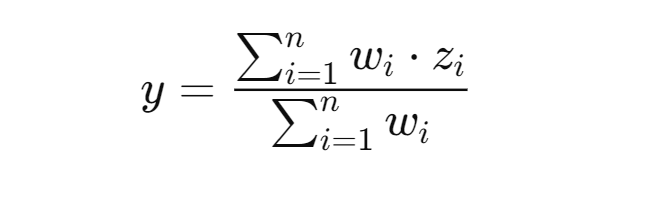

In [178]:
# Hitung output final (Sugeno) sebagai rata-rata tertimbang
total_activation = active_rule1 + active_rule2 + active_rule3 + active_rule4 + active_rule5
if total_activation != 0:
    output_final = (output1 + output2 + output3 + output4 + output5) / total_activation
else:
    output_final = 0

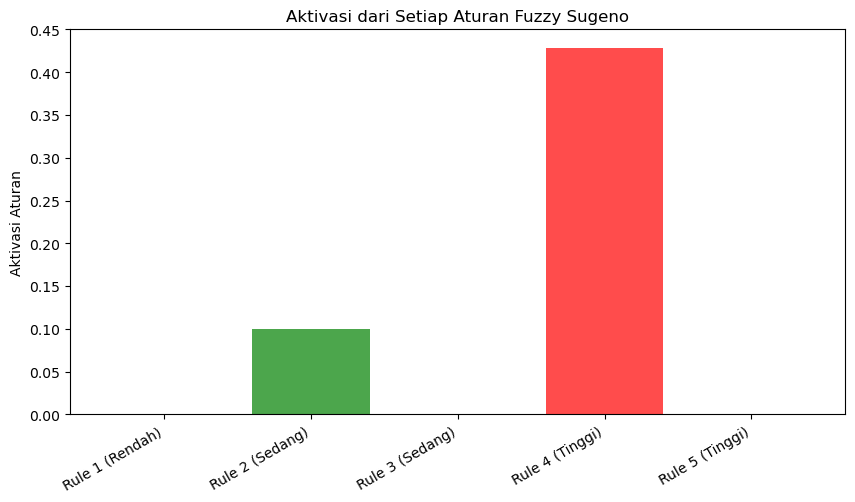

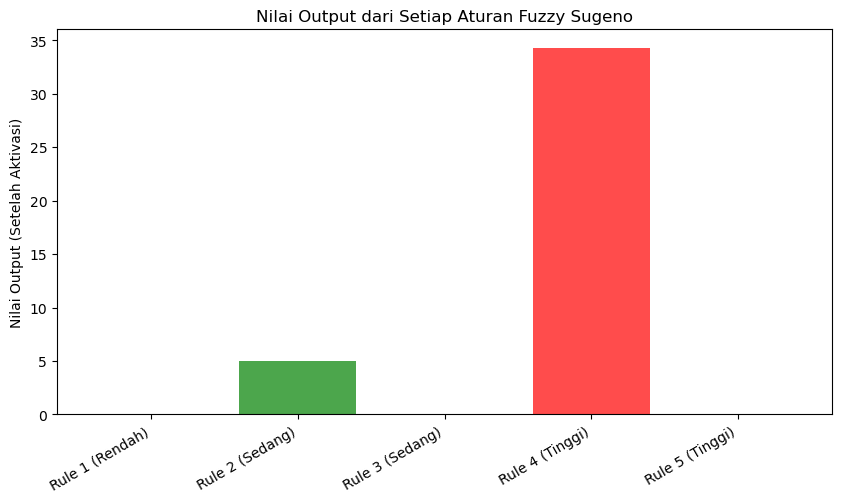

Tingkat Kenyamanan Final (Sugeno): 74.32


In [180]:
# Visualisasi aktivasi dari setiap aturan
labels = ['Rule 1 (Rendah)', 'Rule 2 (Sedang)', 'Rule 3 (Sedang)', 'Rule 4 (Tinggi)', 'Rule 5 (Tinggi)']
activations = [active_rule1, active_rule2, active_rule3, active_rule4, active_rule5]
outputs = [output1, output2, output3, output4, output5]

fig, ax = plt.subplots(figsize=(10, 5))

# Menampilkan grafik batang untuk aktivasi aturan
ax.bar(labels, activations, color=['blue', 'green', 'green', 'red', 'red'], alpha=0.7)
ax.set_ylabel('Aktivasi Aturan')
ax.set_title('Aktivasi dari Setiap Aturan Fuzzy Sugeno')
plt.xticks(rotation=30, ha='right')
plt.show()

# Visualisasi nilai output dari setiap aturan
fig, ax = plt.subplots(figsize=(10, 5))

# Menampilkan grafik batang untuk output aturan
ax.bar(labels, outputs, color=['blue', 'green', 'green', 'red', 'red'], alpha=0.7)
ax.set_ylabel('Nilai Output (Setelah Aktivasi)')
ax.set_title('Nilai Output dari Setiap Aturan Fuzzy Sugeno')
plt.xticks(rotation=30, ha='right')
plt.show()

# Tampilkan hasil final
print(f"Tingkat Kenyamanan Final (Sugeno): {output_final:.2f}")

Rule 4 (Tinggi) mendominasi karena memiliki aktivasi tinggi, yang menyebabkan output akhir cenderung tinggi pula. Dengan kata lain, input yang di berikan lebih cocok dengan aturan untuk kategori "Tinggi" dalam sistem inferensi fuzzy.

### Uji Suhu dengan `suhu : 30° dan 75%`

In [120]:
# Input suhu dan kelembapan
suhu = 30
kelembapan = 75

# Menghitung derajat keanggotaan input suhu dan kelembapan
suhu_level_lo = fuzz.interp_membership(x_suhu, suhu_rendah, suhu)
suhu_level_md = fuzz.interp_membership(x_suhu, suhu_sedang, suhu)
suhu_level_hi = fuzz.interp_membership(x_suhu, suhu_tinggi, suhu)

kelembapan_level_lo = fuzz.interp_membership(x_kelembapan, kelembapan_rendah, kelembapan)
kelembapan_level_md = fuzz.interp_membership(x_kelembapan, kelembapan_sedang, kelembapan)
kelembapan_level_hi = fuzz.interp_membership(x_kelembapan, kelembapan_tinggi, kelembapan)

# Output Sugeno (nilai crisp tetap)
output_rendah = 20
output_sedang = 50
output_tinggi = 80

In [122]:
# Aturan Sugeno
# Aturan 1: Jika Suhu Rendah dan Kelembapan Rendah, maka output = 20 (rendah)
active_rule1 = np.fmin(suhu_level_lo, kelembapan_level_lo)
output1 = active_rule1 * output_rendah

# Aturan 2: Jika Suhu Rendah dan Kelembapan Sedang, maka output = 50 (sedang)
active_rule2 = np.fmin(suhu_level_lo, kelembapan_level_md)
output2 = active_rule2 * output_sedang

# Aturan 3: Jika Suhu Sedang dan Kelembapan Rendah, maka output = 50 (sedang)
active_rule3 = np.fmin(suhu_level_md, kelembapan_level_lo)
output3 = active_rule3 * output_sedang

# Aturan 4: Jika Suhu Sedang dan Kelembapan Sedang, maka output = 80 (tinggi)
active_rule4 = np.fmin(suhu_level_md, kelembapan_level_md)
output4 = active_rule4 * output_tinggi

# Aturan 5: Jika Suhu Tinggi dan Kelembapan Tinggi, maka output = 80 (tinggi)
active_rule5 = np.fmin(suhu_level_hi, kelembapan_level_hi)
output5 = active_rule5 * output_tinggi

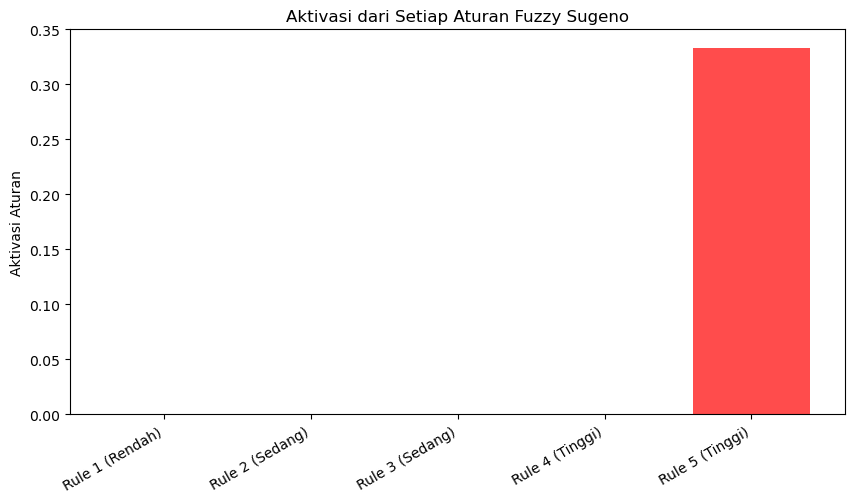

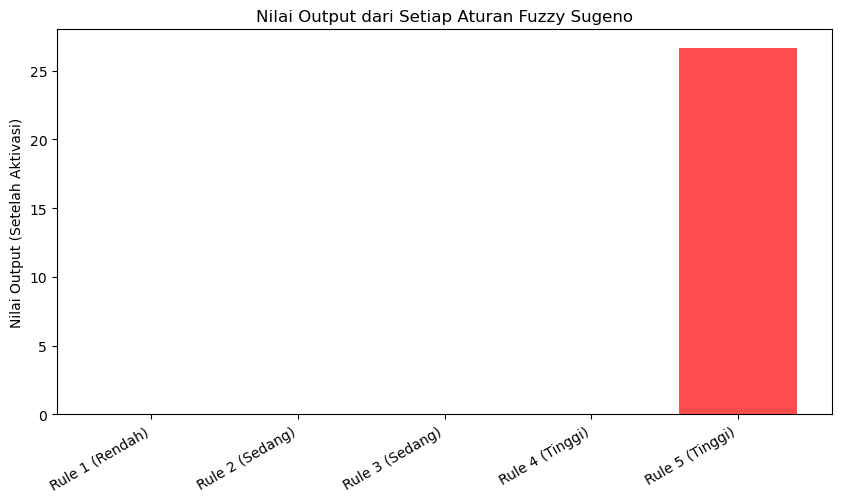

Tingkat Kenyamanan Final (Sugeno): 80.00


In [124]:
# Hitung output final (Sugeno) sebagai rata-rata tertimbang
total_activation = active_rule1 + active_rule2 + active_rule3 + active_rule4 + active_rule5
if total_activation != 0:
    output_final = (output1 + output2 + output3 + output4 + output5) / total_activation
else:
    output_final = 0

# Visualisasi aktivasi dari setiap aturan
labels = ['Rule 1 (Rendah)', 'Rule 2 (Sedang)', 'Rule 3 (Sedang)', 'Rule 4 (Tinggi)', 'Rule 5 (Tinggi)']
activations = [active_rule1, active_rule2, active_rule3, active_rule4, active_rule5]
outputs = [output1, output2, output3, output4, output5]

fig, ax = plt.subplots(figsize=(10, 5))

# Menampilkan grafik batang untuk aktivasi aturan
ax.bar(labels, activations, color=['blue', 'green', 'green', 'red', 'red'], alpha=0.7)
ax.set_ylabel('Aktivasi Aturan')
ax.set_title('Aktivasi dari Setiap Aturan Fuzzy Sugeno')
plt.xticks(rotation=30, ha='right')
plt.show()

# Visualisasi nilai output dari setiap aturan
fig, ax = plt.subplots(figsize=(10, 5))

# Menampilkan grafik batang untuk output aturan
ax.bar(labels, outputs, color=['blue', 'green', 'green', 'red', 'red'], alpha=0.7)
ax.set_ylabel('Nilai Output (Setelah Aktivasi)')
ax.set_title('Nilai Output dari Setiap Aturan Fuzzy Sugeno')
plt.xticks(rotation=30, ha='right')
plt.show()

# Tampilkan hasil final
print(f"Tingkat Kenyamanan Final (Sugeno): {output_final:.2f}")

Rule 4 (Tinggi) mendominasi karena memiliki aktivasi tinggi, yang menyebabkan output akhir cenderung tinggi pula. Dengan kata lain, input yang di berikan lebih cocok dengan aturan untuk kategori "Tinggi" dalam sistem inferensi fuzzy.

### Uji Suhu dengan `suhu : 30° dan 75%`

In [128]:
# Input suhu dan kelembapan
suhu = 18
kelembapan = 25

# Menghitung derajat keanggotaan input suhu dan kelembapan
suhu_level_lo = fuzz.interp_membership(x_suhu, suhu_rendah, suhu)
suhu_level_md = fuzz.interp_membership(x_suhu, suhu_sedang, suhu)
suhu_level_hi = fuzz.interp_membership(x_suhu, suhu_tinggi, suhu)

kelembapan_level_lo = fuzz.interp_membership(x_kelembapan, kelembapan_rendah, kelembapan)
kelembapan_level_md = fuzz.interp_membership(x_kelembapan, kelembapan_sedang, kelembapan)
kelembapan_level_hi = fuzz.interp_membership(x_kelembapan, kelembapan_tinggi, kelembapan)

# Output Sugeno (nilai crisp tetap)
output_rendah = 20
output_sedang = 50
output_tinggi = 80

In [130]:
# Aturan Sugeno
# Aturan 1: Jika Suhu Rendah dan Kelembapan Rendah, maka output = 20 (rendah)
active_rule1 = np.fmin(suhu_level_lo, kelembapan_level_lo)
output1 = active_rule1 * output_rendah

# Aturan 2: Jika Suhu Rendah dan Kelembapan Sedang, maka output = 50 (sedang)
active_rule2 = np.fmin(suhu_level_lo, kelembapan_level_md)
output2 = active_rule2 * output_sedang

# Aturan 3: Jika Suhu Sedang dan Kelembapan Rendah, maka output = 50 (sedang)
active_rule3 = np.fmin(suhu_level_md, kelembapan_level_lo)
output3 = active_rule3 * output_sedang

# Aturan 4: Jika Suhu Sedang dan Kelembapan Sedang, maka output = 80 (tinggi)
active_rule4 = np.fmin(suhu_level_md, kelembapan_level_md)
output4 = active_rule4 * output_tinggi

# Aturan 5: Jika Suhu Tinggi dan Kelembapan Tinggi, maka output = 80 (tinggi)
active_rule5 = np.fmin(suhu_level_hi, kelembapan_level_hi)
output5 = active_rule5 * output_tinggi

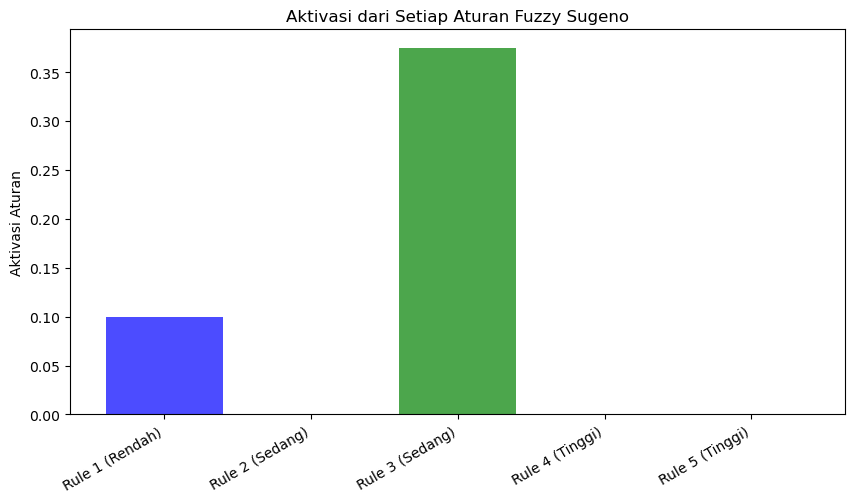

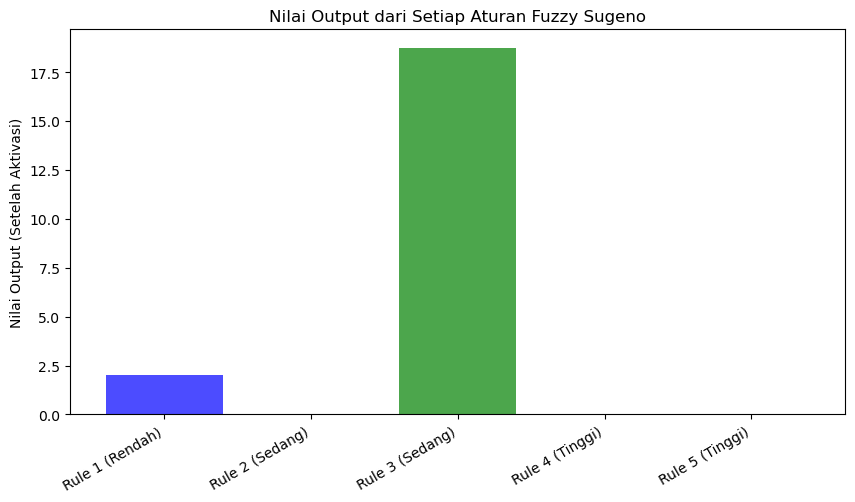

Tingkat Kenyamanan Final (Sugeno): 43.68


In [132]:
# Hitung output final (Sugeno) sebagai rata-rata tertimbang
total_activation = active_rule1 + active_rule2 + active_rule3 + active_rule4 + active_rule5
if total_activation != 0:
    output_final = (output1 + output2 + output3 + output4 + output5) / total_activation
else:
    output_final = 0

# Visualisasi aktivasi dari setiap aturan
labels = ['Rule 1 (Rendah)', 'Rule 2 (Sedang)', 'Rule 3 (Sedang)', 'Rule 4 (Tinggi)', 'Rule 5 (Tinggi)']
activations = [active_rule1, active_rule2, active_rule3, active_rule4, active_rule5]
outputs = [output1, output2, output3, output4, output5]

fig, ax = plt.subplots(figsize=(10, 5))

# Menampilkan grafik batang untuk aktivasi aturan
ax.bar(labels, activations, color=['blue', 'green', 'green', 'red', 'red'], alpha=0.7)
ax.set_ylabel('Aktivasi Aturan')
ax.set_title('Aktivasi dari Setiap Aturan Fuzzy Sugeno')
plt.xticks(rotation=30, ha='right')
plt.show()

# Visualisasi nilai output dari setiap aturan
fig, ax = plt.subplots(figsize=(10, 5))

# Menampilkan grafik batang untuk output aturan
ax.bar(labels, outputs, color=['blue', 'green', 'green', 'red', 'red'], alpha=0.7)
ax.set_ylabel('Nilai Output (Setelah Aktivasi)')
ax.set_title('Nilai Output dari Setiap Aturan Fuzzy Sugeno')
plt.xticks(rotation=30, ha='right')
plt.show()

# Tampilkan hasil final
print(f"Tingkat Kenyamanan Final (Sugeno): {output_final:.2f}")

Rule 3 (sedang) mendominasi karena memiliki aktivasi tinggi, yang menyebabkan output akhir cenderung sedang pula. Dengan kata lain, input yang di berikan lebih cocok dengan aturan untuk kategori "sedang" dalam sistem inferensi fuzzy.

## Perbedaan Antara Sistem Inferensi Fuzzy Mamdani dan Sugeno:

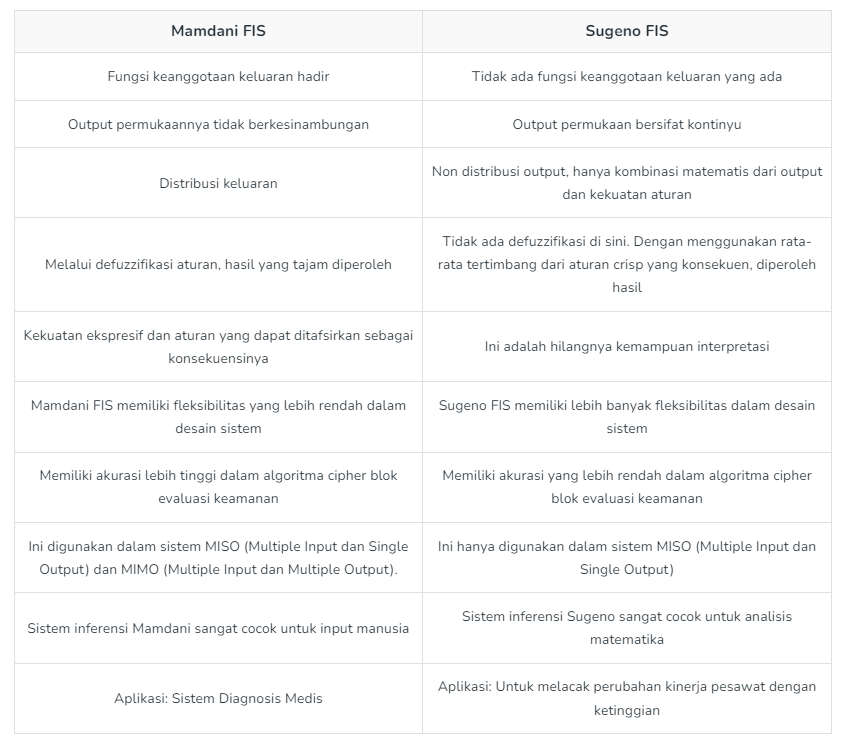